In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\indhu\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#IMPORTING LIBRARIES

In [8]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier # Import ExtraTreesClassifier from ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

#READING THE  DATASET

In [9]:
flights=pd.read_csv("flightdata.csv")
flights

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,0.0,1223,1148.0,-35.0,0.0,0,0,138,105.0,594
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,1.0,2046,2100.0,14.0,0.0,0,0,201,181.0,1399
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,0.0,2210,2154.0,-16.0,0.0,0,0,311,295.0,1927
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,0.0,1806,1801.0,-5.0,0.0,0,0,336,332.0,2182


In [10]:
flights.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927


In [11]:
flights.tail()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,0.0,1223,1148.0,-35.0,0.0,0,0,138,105.0,594
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,1.0,2046,2100.0,14.0,0.0,0,0,201,181.0,1399
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,0.0,2210,2154.0,-16.0,0.0,0,0,311,295.0,1927
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,0.0,1806,1801.0,-5.0,0.0,0,0,336,332.0,2182
11230,2016,4,12,30,5,DL,N843DN,2005,10397,ATL,...,0.0,925,913.0,-12.0,0.0,0,0,120,110.0,594


#PREPROCESSING

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [13]:
flights.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11124.000000,11231.000000,11116.000000,11043.000000,11045.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,0.142844,1537.312795,1523.978499,-2.573123,0.124672,0.010150,0.006589,190.652124,179.661233,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,0.349930,502.512494,512.536041,39.232521,0.330361,0.100241,0.080908,78.386317,77.940399,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


In [14]:
flights.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              186
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [15]:
flights['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

#DATA VISUALISATION

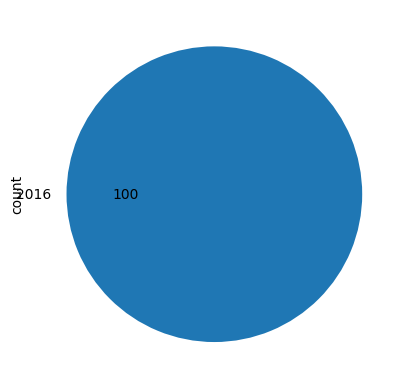

In [16]:
import matplotlib.pyplot as plt
flights['YEAR'].value_counts().plot(kind='pie',autopct='%.0f')
plt.show()

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

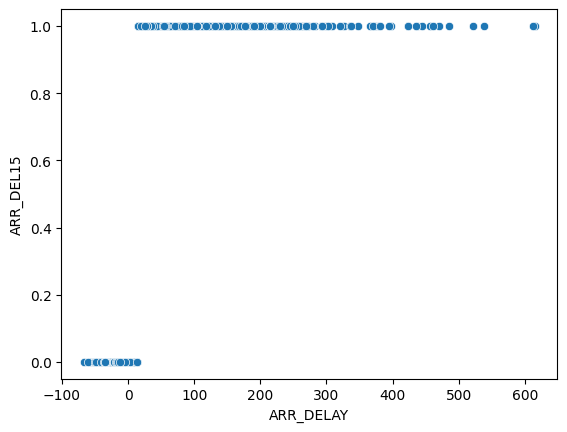

In [17]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=flights)

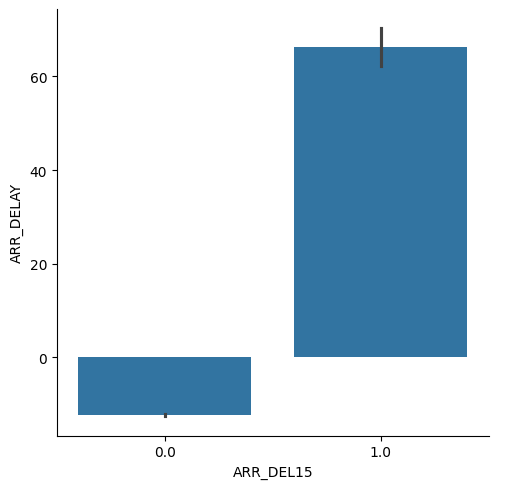

In [18]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=flights)

#HEAT MAP

<Axes: >

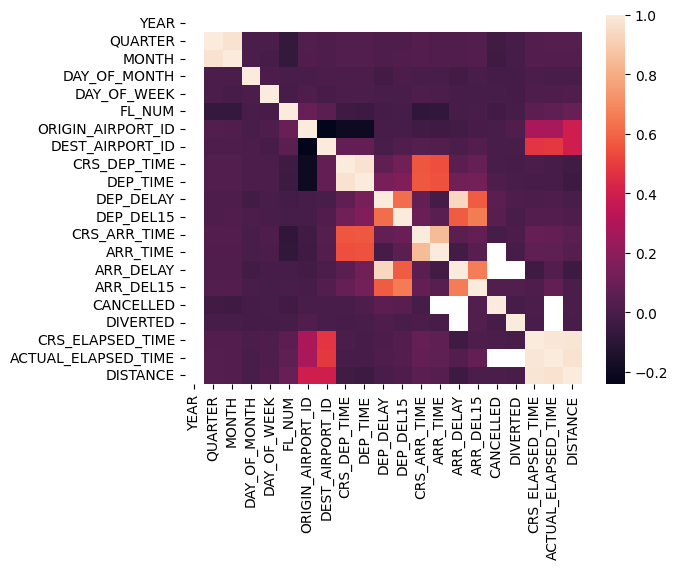

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
non_numerical_cols=flights.select_dtypes(exclude=[np.number]).columns
flights_numeric=flights.drop(non_numerical_cols,axis=1)
sns.heatmap(flights_numeric.corr())

In [20]:
import pandas as pd
#dataset=pd.read_csv("flightdata.csv")
if "Unnamed: 25" in flights.columns: # Check if the column exists before dropping
    flights=flights.drop("Unnamed: 25",axis=1)
flights.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              186
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [21]:
flights.shape

(11231, 25)

In [22]:
print(flights.columns)
flights=flights[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
flights.isnull().sum()

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE'],
      dtype='object')


FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       186
dtype: int64

#Handling Missing Values

In [23]:
flights=flights.fillna({'ARR_DEL15':1})
flights=flights.fillna({'dep_del15':0})
flights.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,NaN,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [24]:
import math
for index,row in flights.iterrows():
  flights.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)
flights.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [25]:
flights.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


#Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
flights['ORIGIN']=le.fit_transform(flights['ORIGIN'])
flights['DEST']=le.fit_transform(flights['DEST'])
flights.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


#OneHotEncoder

In [27]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(flights.iloc[:,4:5]).toarray()
t=oh.fit_transform(flights.iloc[:,5:6]).toarray()
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [29]:
print(flights.dtypes)

FL_NUM            int64
MONTH             int64
DAY_OF_MONTH      int64
DAY_OF_WEEK       int64
ORIGIN            int64
DEST              int64
CRS_ARR_TIME      int64
DEP_DEL15       float64
ARR_DEL15       float64
dtype: object


In [30]:
flights = flights.dropna()

In [31]:
"""
import pandas as pd
flights=pd.read_csv('flightdata.csv')
flights=pd.get_dummies(flights,columns=['ORIGIN','DEST'])
flights.head()
"""
x=flights.iloc[:,0:8].values
y=flights.iloc[:,8:9].values

In [32]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 2.100e+01,
        0.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 3.000e+00, 1.400e+01,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 1.200e+01,
        0.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 2.200e+01,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 1.800e+01,
        0.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 1.000e+00, 9.000e+00,
        0.000e+00]])

In [33]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

#Splitting The Dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_test.shape,y_test.shape

((2225, 8), (2225, 1))

In [36]:
x_train.shape,y_train.shape

((8899, 8), (8899, 1))

1.RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict1)
test_accuracy

c:\Users\indhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9150561797752809

In [38]:
y_train_predict1 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict1)
train_accuracy
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1932
         1.0       0.71      0.59      0.65       293

    accuracy                           0.92      2225
   macro avg       0.83      0.78      0.80      2225
weighted avg       0.91      0.92      0.91      2225



In [52]:
confusion_matrix(y_test, y_test_predict1)

array([[1865,   67],
       [ 122,  171]])

2. Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_test_predict2 = lr.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict2)
test_accuracy

c:\Users\indhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\indhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9182022471910113

In [40]:
y_train_predict2 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict2)
train_accuracy
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1932
         1.0       0.70      0.65      0.68       293

    accuracy                           0.92      2225
   macro avg       0.83      0.81      0.82      2225
weighted avg       0.92      0.92      0.92      2225



In [53]:
confusion_matrix(y_test, y_test_predict2)

array([[1852,   80],
       [ 102,  191]])

3. DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_test_predict3 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict3)
test_accuracy

0.8606741573033708

In [42]:
y_train_predict3 = dtc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1932
         1.0       0.47      0.48      0.48       293

    accuracy                           0.86      2225
   macro avg       0.70      0.70      0.70      2225
weighted avg       0.86      0.86      0.86      2225



In [54]:
confusion_matrix(y_test, y_test_predict3)

array([[1773,  159],
       [ 151,  142]])

4. **ExtraTreeClassifier**

In [43]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict4 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict4)
test_accuracy

c:\Users\indhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9087640449438202

In [44]:
y_train_predict4 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict4)
train_accuracy
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1932
         1.0       0.69      0.56      0.62       293

    accuracy                           0.91      2225
   macro avg       0.81      0.76      0.78      2225
weighted avg       0.90      0.91      0.90      2225



In [55]:
confusion_matrix(y_test, y_test_predict4)

array([[1857,   75],
       [ 128,  165]])

#Comparing Models

In [45]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict4,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for lr",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for lr",accuracy_score(y_test_predict2,y_test))
compareModel()

train accuracy for rfc 0.9997752556467019
test accuracy for rfc 0.9150561797752809
train accuracy for dtc 1.0
test accuracy for dtc 0.8606741573033708
train accuracy for etc 1.0
test accuracy for etc 0.9087640449438202
train accuracy for lr 0.9997752556467019
test accuracy for lr 0.9182022471910113


In [46]:
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.92


#Evaluating The performance

In [47]:
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
for i in range(x_train.shape[1]):
  if isinstance(x_train[0,i],str):
    x_train[:,i]=le.fit_transform(x_train[:,i])
    x_test[:,i]=le.fit_transform(x_test[:,i])
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [48]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict1)
test_accuracy

c:\Users\indhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9150561797752809

In [49]:
y_train_predict1 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict1)
train_accuracy

0.9998876278233509

In [50]:
import pickle
pickle.dump(rfc,open('flights.pkl','wb'))